In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np

In [2]:
data = pd.read_csv('temperature.csv')
data

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
5,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,...,285.944057,288.485467,285.874069,287.322831,306.898887,304.194188,310.243077,304.4,304.4,303.5
6,2012-10-01 18:00:00,284.620868,282.117710,289.417494,281.767681,291.846821,291.572917,293.359284,296.700424,285.472132,...,286.037673,288.564730,285.887208,287.368410,306.652574,304.150361,310.158846,304.4,304.4,303.5
7,2012-10-01 19:00:00,284.618824,282.126324,289.403119,281.760297,291.841480,291.582772,293.348320,296.723403,285.551525,...,286.131290,288.643994,285.900348,287.413990,306.406261,304.106534,310.074615,304.4,304.4,303.5
8,2012-10-01 20:00:00,284.616781,282.134939,289.388745,281.752912,291.836139,291.592626,293.337356,296.746381,285.630919,...,286.224906,288.723257,285.913487,287.459569,306.159948,304.062708,309.990385,304.4,304.4,303.5
9,2012-10-01 21:00:00,284.614738,282.143553,289.374370,281.745528,291.830798,291.602480,293.326392,296.769360,285.710312,...,286.318522,288.802521,285.926627,287.505149,305.913635,304.018881,309.906154,304.4,304.4,303.5


In [3]:
d = data['Detroit']
d

0               NaN
1        284.030000
2        284.069789
3        284.173965
4        284.278140
5        284.382316
6        284.486491
7        284.590666
8        284.694842
9        284.799017
10       284.903193
11       285.007368
12       285.111544
13       285.215719
14       285.319895
15       285.424070
16       285.528246
17       285.632421
18       285.736596
19       285.840772
20       285.944947
21       286.049123
22       286.153298
23       286.257474
24       286.361649
25       286.465825
26       286.570000
27       289.140000
28       289.600000
29       290.770000
            ...    
45223    290.480000
45224    290.920000
45225    290.930000
45226    289.960000
45227    289.820000
45228    287.820000
45229    288.150000
45230    288.360000
45231    287.580000
45232    286.810000
45233    286.030000
45234    284.700000
45235    283.040000
45236    281.590000
45237    280.340000
45238    279.850000
45239    279.150000
45240    277.640000
45241    276.370000


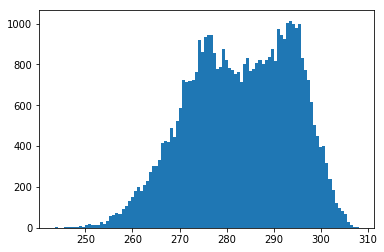

In [4]:
n,bins,patches = plt.hist(d.dropna(),bins=100)

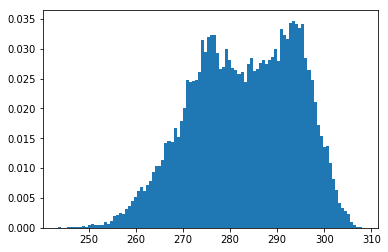

In [5]:
n,bins,patches = plt.hist(d.dropna(),bins=100,density=True)

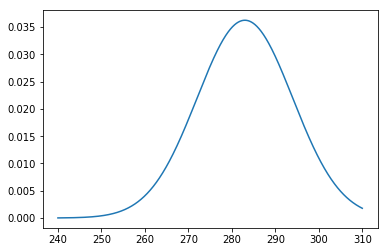

In [6]:
x = np.linspace(240, 310, 1000)
plt.plot(x,norm.pdf(x,283,11))

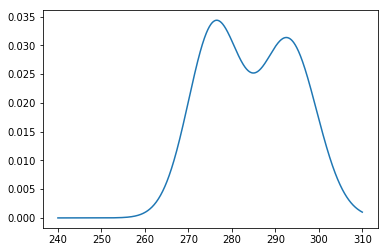

In [7]:
val1 = norm.pdf(x,276,6)
val2 = norm.pdf(x,293,6.5)
plt.plot(x,(val1+val2)/2)

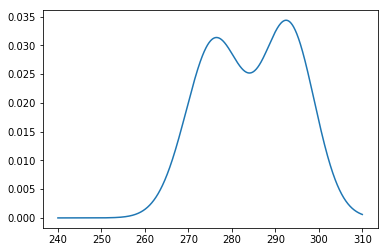

In [8]:
val1 = norm.pdf(x,276,6.5)
val2 = norm.pdf(x,293,6)
plt.plot(x,(val1+val2)/2)